# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.117027e+01     7.687614e+00
 * time: 0.005697011947631836
     1     2.765077e+01     4.809176e+00
 * time: 0.024863004684448242
     2     1.911165e+01     4.236504e+00
 * time: 0.04868006706237793
     3     1.305081e+01     3.367415e+00
 * time: 0.06893706321716309
     4     1.080932e+01     1.314776e+00
 * time: 0.09065818786621094
     5     9.880477e+00     1.916227e+00
 * time: 0.1076350212097168
     6     9.295710e+00     1.083030e+00
 * time: 0.1237030029296875
     7     8.882879e+00     9.314691e-01
 * time: 0.1414780616760254
     8     8.549125e+00     1.116023e+00
 * time: 0.15898513793945312
     9     8.378806e+00     7.150747e-01
 * time: 0.17652010917663574
    10     8.281793e+00     7.333420e-01
 * time: 0.1945362091064453
    11     8.206726e+00     6.574855e-01
 * time: 0.2122790813446045
    12     8.159096e+00     8.044628e-01
 * time: 0.22554516792297363
    13     8.090779e+00     4.519590e-01
 * time: 0.

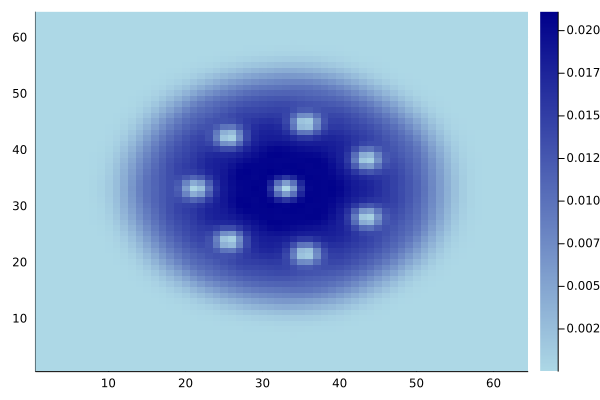

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)